0 / 300
1 / 300
2 / 300
3 / 300
4 / 300
5 / 300
6 / 300
7 / 300
8 / 300
9 / 300
10 / 300
11 / 300
12 / 300
13 / 300
14 / 300
15 / 300
16 / 300
17 / 300
18 / 300
19 / 300
20 / 300
21 / 300
22 / 300
23 / 300
24 / 300
25 / 300
26 / 300
27 / 300
28 / 300
29 / 300
30 / 300
31 / 300
32 / 300
33 / 300
34 / 300
35 / 300
36 / 300
37 / 300
38 / 300
39 / 300
40 / 300
41 / 300
42 / 300
43 / 300
44 / 300
45 / 300
46 / 300
47 / 300
48 / 300
49 / 300
50 / 300
51 / 300
52 / 300
53 / 300
54 / 300
55 / 300
56 / 300
57 / 300
58 / 300
59 / 300
60 / 300
61 / 300
62 / 300
63 / 300
64 / 300
65 / 300
66 / 300
67 / 300
68 / 300
69 / 300
70 / 300
71 / 300
72 / 300
73 / 300
74 / 300
75 / 300
76 / 300
77 / 300
78 / 300
79 / 300
80 / 300
81 / 300
82 / 300
83 / 300
84 / 300
85 / 300
86 / 300
87 / 300
88 / 300
89 / 300
90 / 300
91 / 300
92 / 300
93 / 300
94 / 300
95 / 300
96 / 300
97 / 300
98 / 300
99 / 300
100 / 300
101 / 300
102 / 300
103 / 300
104 / 300
105 / 300
106 / 300
107 / 300
108 / 300
109 / 300
110 / 300


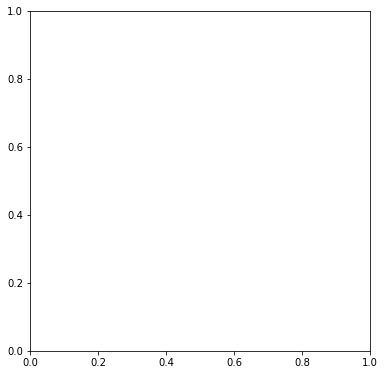

In [8]:
import sys
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Pendulum rod lengths (m), bob masses (kg).
L1, L2 = 1, 2
m1, m2 = 1, 1
# The gravitational acceleration (m.s-2).
g = 9.81

def deriv(y, t, L1, L2, m1, m2):
    """Return the first derivatives of y = theta1, z1, theta2, z2."""
    theta1, z1, theta2, z2 = y

    c, s = np.cos(theta1-theta2), np.sin(theta1-theta2)

    theta1dot = z1
    z1dot = (m2*g*np.sin(theta2)*c - m2*s*(L1*z1**2*c + L2*z2**2) -
             (m1+m2)*g*np.sin(theta1)) / L1 / (m1 + m2*s**2)
    theta2dot = z2
    z2dot = ((m1+m2)*(L1*z1**2*s - g*np.sin(theta2) + g*np.sin(theta1)*c) + 
             m2*L2*z2**2*s*c) / L2 / (m1 + m2*s**2)
    return theta1dot, z1dot, theta2dot, z2dot

def calc_E(y):
    """Return the total energy of the system."""

    th1, th1d, th2, th2d = y.T
    V = -(m1+m2)*L1*g*np.cos(th1) - m2*L2*g*np.cos(th2)
    T = 0.5*m1*(L1*th1d)**2 + 0.5*m2*((L1*th1d)**2 + (L2*th2d)**2 +
            2*L1*L2*th1d*th2d*np.cos(th1-th2))
    return T + V

# Maximum time, time point spacings and the time grid (all in s).
tmax, dt = 30, 0.01
t = np.arange(0, tmax+dt, dt)
# Initial conditions: theta1, dtheta1/dt, theta2, dtheta2/dt.
y0 = np.array([3*np.pi/7, 0, 3*np.pi/4, 0])

# Do the numerical integration of the equations of motion
y = odeint(deriv, y0, t, args=(L1, L2, m1, m2))

# Check that the calculation conserves total energy to within some tolerance.
EDRIFT = 0.05
# Total energy from the initial conditions
E = calc_E(y0)
if np.max(np.sum(np.abs(calc_E(y) - E))) > EDRIFT:
    sys.exit('Maximum energy drift of {} exceeded.'.format(EDRIFT))

# Unpack z and theta as a function of time
theta1, theta2 = y[:,0], y[:,2]

# Convert to Cartesian coordinates of the two bob positions.
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

# Plotted bob circle radius
r = 0.05
# Plot a trail of the m2 bob's position for the last trail_secs seconds.
trail_secs = 1
# This corresponds to max_trail time points.
max_trail = int(trail_secs / dt)

def make_plot(i):
    # Plot and save an image of the double pendulum configuration for time
    # point i.
    # The pendulum rods.
    ax.plot([0, x1[i], x2[i]], [0, y1[i], y2[i]], lw=2, c='k')
    # Circles representing the anchor point of rod 1, and bobs 1 and 2.
    c0 = Circle((0, 0), r/2, fc='k', zorder=10)
    c1 = Circle((x1[i], y1[i]), r, fc='b', ec='b', zorder=10)
    c2 = Circle((x2[i], y2[i]), r, fc='r', ec='r', zorder=10)
    ax.add_patch(c0)
    ax.add_patch(c1)
    ax.add_patch(c2)

    # The trail will be divided into ns segments and plotted as a fading line.
    ns = 20
    s = max_trail // ns

    for j in range(ns):
        imin = i - (ns-j)*s
        if imin < 0:
            continue
        imax = imin + s + 1
        # The fading looks better if we square the fractional length along the
        # trail.
        alpha = (j/ns)**2
        ax.plot(x2[imin:imax], y2[imin:imax], c='r', solid_capstyle='butt',
                lw=2, alpha=alpha)

    # Centre the image on the fixed anchor point, and ensure the axes are equal
    ax.set_xlim(-L1-L2-r, L1+L2+r)
    ax.set_ylim(-L1-L2-r, L1+L2+r)
    ax.set_aspect('equal', adjustable='box')
    plt.axis('off')
    plt.savefig('frames/_img{:04d}.png'.format(i//di), dpi=72)
    plt.cla()


# Make an image every di time points, corresponding to a frame rate of fps
# frames per second.
# Frame rate, s-1
fps = 10
di = int(1/fps/dt)
fig = plt.figure(figsize=(8.3333, 6.25), dpi=72)
ax = fig.add_subplot(111)

for i in range(0, t.size, di):
    print(i // di, '/', t.size // di)
    make_plot(i)

In [6]:
%cd frames

[WinError 2] The system cannot find the file specified: 'frames'
C:\Users\david


In [9]:
def definePendulum():
    # Pendulum rod lengths (m), bob masses (kg).
    L1, L2 = 1, 2
    m1, m2 = 1, 1
    # The gravitational acceleration (m.s-2).
    g = 9.81
    for i in range(t.size,di):
        ax.plot([0, x1[i], x2[i]], [0, y1[i], y2[i]], lw=2, c='k')
        # Circles representing the anchor point of rod 1, and bobs 1 and 2.
        c0 = Circle((0, 0), r/2, fc='k', zorder=10)
        c1 = Circle((x1[i], y1[i]), r, fc='b', ec='b', zorder=10)
        c2 = Circle((x2[i], y2[i]), r, fc='r', ec='r', zorder=10)
        ax.add_patch(c0)
        ax.add_patch(c1)
        ax.add_patch(c2)
    
        # The trail will be divided into ns segments and plotted as a fading line.
        ns = 20
        s = max_trail // ns
    
        for j in range(ns):
            imin = i - (ns-j)*s
            if imin < 0:
                continue
            imax = imin + s + 1
            # The fading looks better if we square the fractional length along the
            # trail.
            alpha = (j/ns)
            ax.plot(x2[imin:imax], y2[imin:imax], c='r', solid_capstyle='butt',
                    lw=2, alpha=alpha)
    
        # Centre the image on the fixed anchor point, and ensure the axes are equal
        ax.set_xlim(-L1-L2-r, L1+L2+r)
        ax.set_ylim(-L1-L2-r, L1+L2+r)
        ax.set_aspect('equal', adjustable='box')
        plt.axis('off')
        plt.savefig('frames/_img{:04d}.png'.format(i//di), dpi=72)
        plt.cla()
        print(i // di, '/', t.size // di)
        make_plot(i)

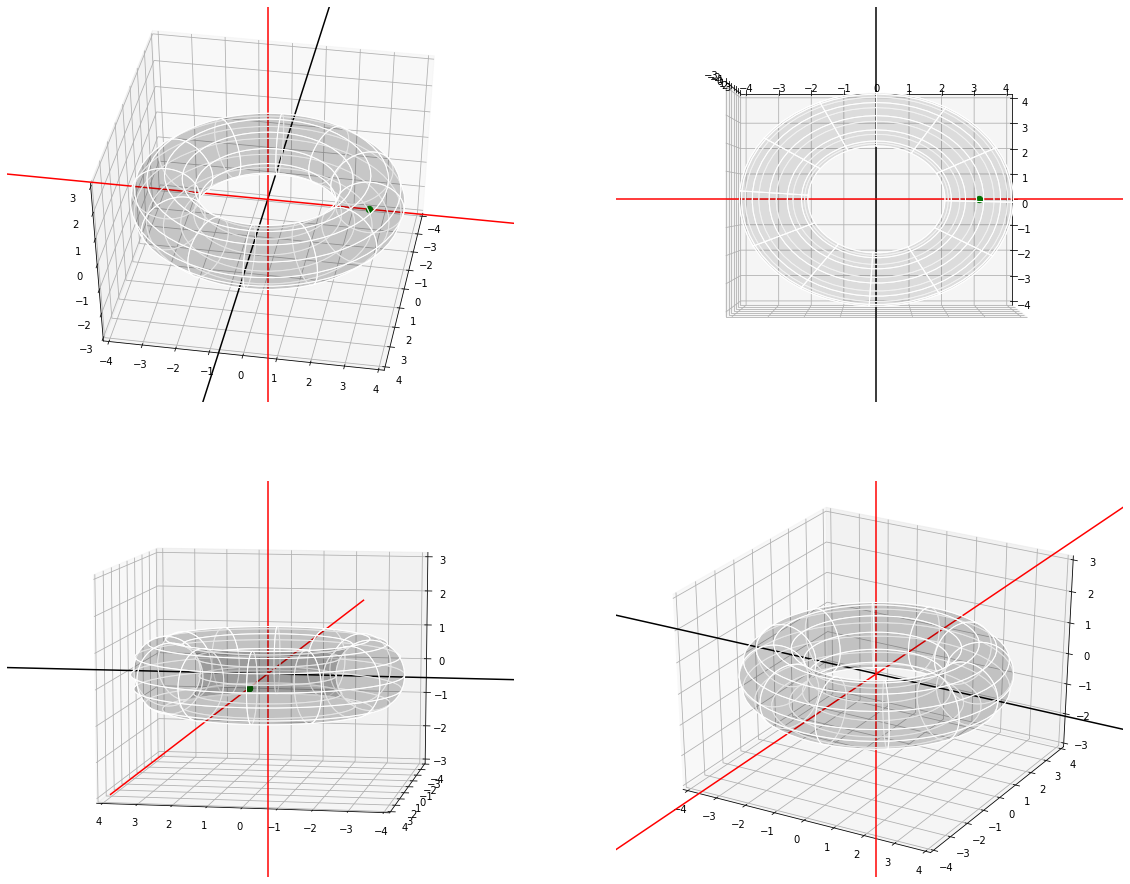

In [124]:
from mpl_toolkits.mplot3d import Axes3D

n = 60

theta = np.linspace(0, 2.*np.pi, n)
phi = np.linspace(0, 2.*np.pi, n)
theta, phi = np.meshgrid(theta, phi)
c, a = 3, 1
x = (c + a*np.cos(theta)) * np.cos(phi)
y = (c + a*np.cos(theta)) * np.sin(phi)
z = a * np.sin(theta)

fig = plt.figure(figsize=(20,16))

ax1 = fig.add_subplot(221, projection='3d')

ax1.set_zlim(-3,3)
ax1.set_xlim(-4,4)
ax1.set_ylim(-4,4)
ax1.plot([-20,20], [0,0], [0,0],color="black")
ax1.plot( [0,0],[-20,20], [0,0],color="red")
ax1.plot( [0,0], [0,0],[-20,20],color="red")
ax1.plot_surface(x, y, z, rstride=5, cstride=5, color='k', edgecolors='w',alpha=0.1)

theta1=0.5*np.pi
phi1=0.5*np.pi
x1,y1=(c + a*np.cos(theta1)) * np.cos(phi1),(c + a*np.cos(phi1)) * np.sin(phi1)
theta2=0.2*np.pi
phi2=1*np.pi
x2,y2=(c + a*np.cos(theta2)) * np.cos(phi2),(c + a*np.cos(phi2)) * np.sin(phi2)

ax1.scatter([x1],[y1],s=40,c="green")

ax1.view_init(45, 10)


######################################################################################################


ax2 = fig.add_subplot(222, projection='3d')

ax2.set_zlim(-3,3)
ax2.set_xlim(-4,4)
ax2.set_ylim(-4,4)
ax2.plot([-20,20], [0,0], [0,0],color="black")
ax2.plot( [0,0],[-20,20], [0,0],color="red")
ax2.plot( [0,0], [0,0],[-20,20],color="red")
ax2.plot_surface(x, y, z, rstride=5, cstride=5, color='k', edgecolors='w',alpha=0.05)

theta1=0.5*np.pi
phi1=0.5*np.pi
x1,y1=(c + a*np.cos(theta1)) * np.cos(phi1),(c + a*np.cos(phi1)) * np.sin(phi1)

ax2.scatter([x1],[y1],s=40,c="green")

ax2.view_init(-90, 2)



###########################################################################################################


ax3 = fig.add_subplot(223, projection='3d')

ax3.set_zlim(-3,3)
ax3.set_xlim(-4,4)
ax3.set_ylim(-4,4)
ax3.plot([-20,20], [0,0], [0,0],color="black")
ax3.plot( [0,0],[-20,20], [0,0],color="red")
ax3.plot( [0,0], [0,0],[-20,20],color="red")
ax3.plot_surface(x, y, z, rstride=5, cstride=5, color='k', edgecolors='w',alpha=0.1)

theta1=0.5*np.pi
phi1=0.5*np.pi
x1,y1=(c + a*np.cos(theta1)) * np.cos(phi1),(c + a*np.cos(phi1)) * np.sin(phi1)

ax3.scatter([x1],[y1],s=40,c="green")

ax3.view_init(10, 100)


###########################################################################################################


ax4 = fig.add_subplot(224, projection='3d')

ax4.set_zlim(-3,3)
ax4.set_xlim(-4,4)
ax4.set_ylim(-4,4)
ax4.plot([-20,20], [0,0], [0,0],color="black")
ax4.plot( [0,0],[-20,20], [0,0],color="red")
ax4.plot( [0,0], [0,0],[-20,20],color="red")
ax4.plot_surface(x, y, z, rstride=5, cstride=5, color='k', edgecolors='w',alpha=0.1)

theta1=0.5*np.pi
phi1=0.5*np.pi
x1,y1=(c + a*np.cos(theta1)) * np.cos(phi1),(c + a*np.cos(phi1)) * np.sin(phi1)

ax3.scatter([x1],[y1],s=40,c="green")

ax3.view_init(10, 100)

plt.show()

In [123]:
ax.plot([0, x1[i], x2[i]], [0, y1[i], y2[i]], lw=2, c='k')
# Circles representing the anchor point of rod 1, and bobs 1 and 2.
c0 = Circle((0, 0), r/2, fc='k', zorder=10)
c1 = Circle((x1, y1), r, fc='b', ec='b', zorder=10)
c2 = Circle((x2, y2), r, fc='r', ec='r', zorder=10)
ax.add_patch(c0)
ax.add_patch(c1)
ax.add_patch(c2)

IndexError: invalid index to scalar variable.